<a href="https://colab.research.google.com/github/Ankuraxz/google-collab/blob/master/Image_GAN_tf_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Demo shows the use of Generative Adversal Networks to create new dataset from Images of Numbers, Dataset: MNIST Handwritten DIgits.





In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # tf_version only exist in colab
  %tensorflow_version 2.x

except Exception:
  pass



# SETUP

In [0]:
import tensorflow as tf
tf.random.set_seed(7)
import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt
import os
import time

#Collecting the MNIST DATASET from tf.keras.datasets




In [0]:
(X_Train, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print("train_images shape:", X_Train.shape)
print("test_images shape:", test_images.shape)
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)



train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000,)
test_labels shape: (10000,)


Info: For GAN, only need the Training images, These will be passed to both the generator and Discriminator. The Labels and Test images are hence not required, and will not be used in the code

# Normalizing using z-score Normalization

In [0]:
X_Train = (X_Train.astype('float32')-127.5)/127.5
X_Train  = X_Train.reshape(-1,28*28)
print(X_Train.shape)

(60000, 784)


# Setting up hyper params.

In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
# Customised ADAM optimizer
adam = tf.keras.optimizers.Adam(lr=2e-4,beta_1=0.5) # lr: Learning Rate


# Making the Generator and Discriminator Network

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model

In [0]:
# Generator
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

# Compile
generator.compile(loss='binary_crossentropy',optimizer=adam)

generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 784)              

In [0]:
#Discriminator
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


# A Combined model that interconnects the input and output of Generator and Discriminator. 
Info: Initially Discriminator isn't trainable, only Generator gets trained
![alt text](https://developers.google.com/machine-learning/gan/images/gan_diagram_discriminator.svg)

Src: https://developers.google.com/machine-learning/gan

In [0]:
# Combined Model (Geneerator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generator_output = generator(gan_input)
gan_output = discriminator(generator_output)

model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [0]:
def showImgs(epoch):
    noise = np.random.normal(0,1,size=(100,NOISE_DIM)) # Random Noise
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(-1,28,28)
    
    #Display the Images
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    

Epoch 1 D Loss 146.9533 G loss 257.2413 


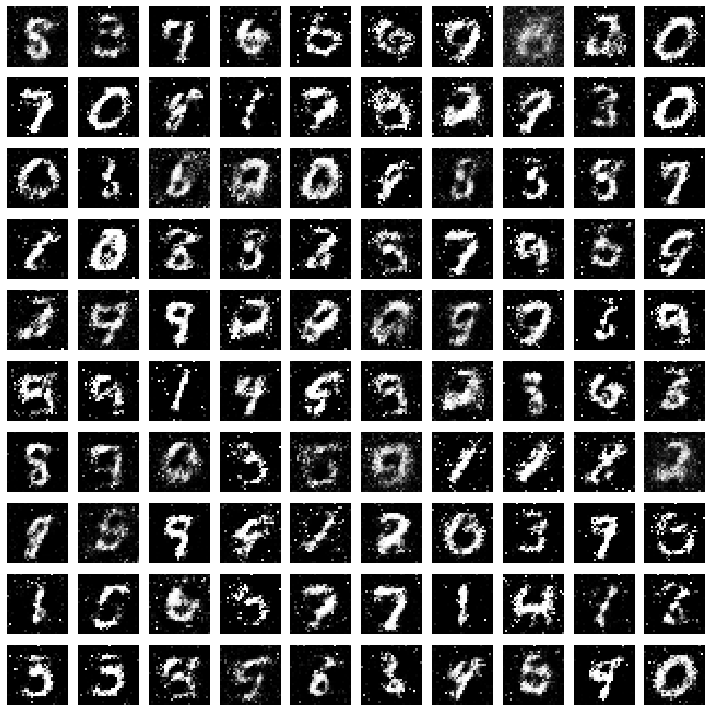

Epoch 2 D Loss 148.5027 G loss 249.5938 
Epoch 3 D Loss 148.7256 G loss 248.6756 
Epoch 4 D Loss 149.9582 G loss 245.9131 
Epoch 5 D Loss 149.0052 G loss 246.7991 
Epoch 6 D Loss 149.8616 G loss 244.2823 


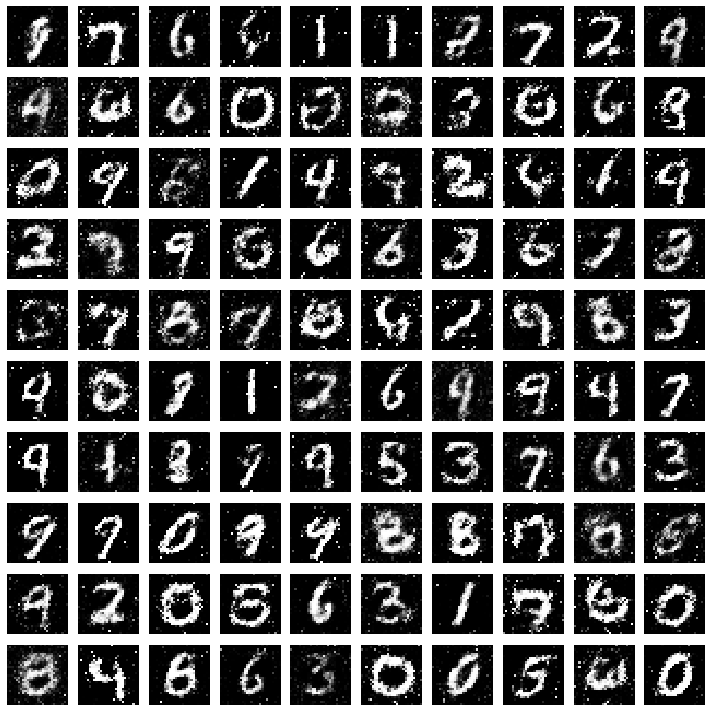

Epoch 7 D Loss 151.6813 G loss 241.8344 
Epoch 8 D Loss 152.2668 G loss 236.6786 
Epoch 9 D Loss 152.8382 G loss 237.1876 
Epoch 10 D Loss 152.7245 G loss 235.6748 
Epoch 11 D Loss 152.8217 G loss 236.6323 


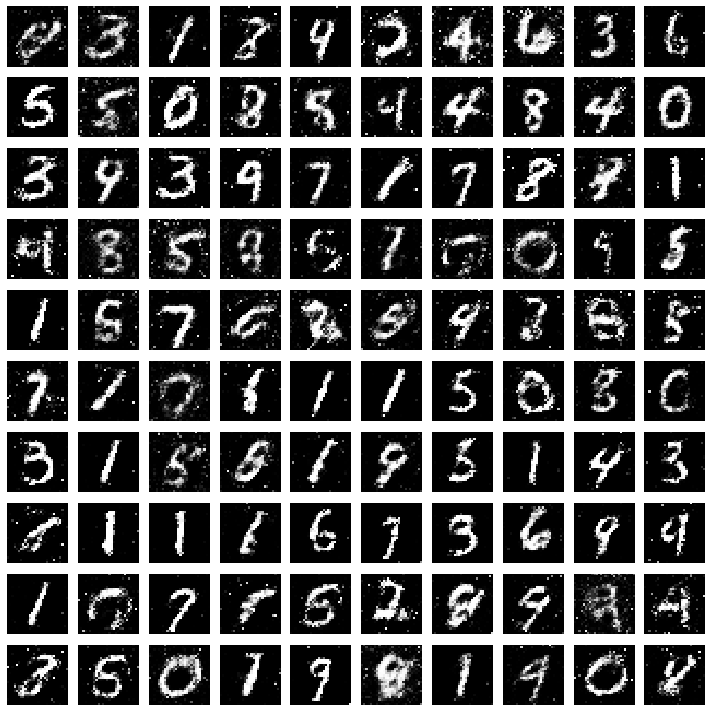

Epoch 12 D Loss 153.0845 G loss 235.6876 
Epoch 13 D Loss 153.9647 G loss 233.5112 
Epoch 14 D Loss 153.8059 G loss 234.3630 
Epoch 15 D Loss 154.6213 G loss 233.6513 
Epoch 16 D Loss 154.5341 G loss 233.1185 


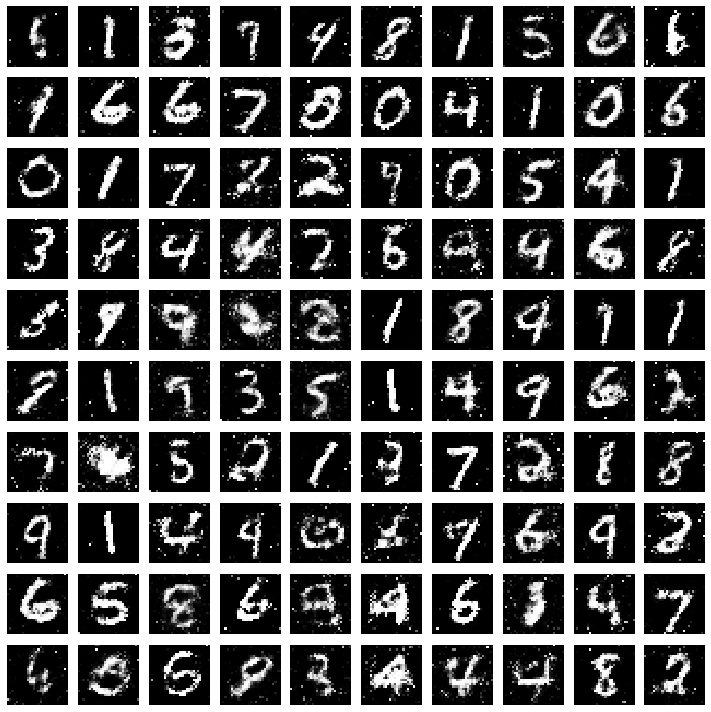

Epoch 17 D Loss 155.2423 G loss 230.2852 
Epoch 18 D Loss 154.9268 G loss 231.6515 
Epoch 19 D Loss 155.4061 G loss 229.1086 
Epoch 20 D Loss 155.5689 G loss 228.5991 
Epoch 21 D Loss 155.6991 G loss 228.7056 


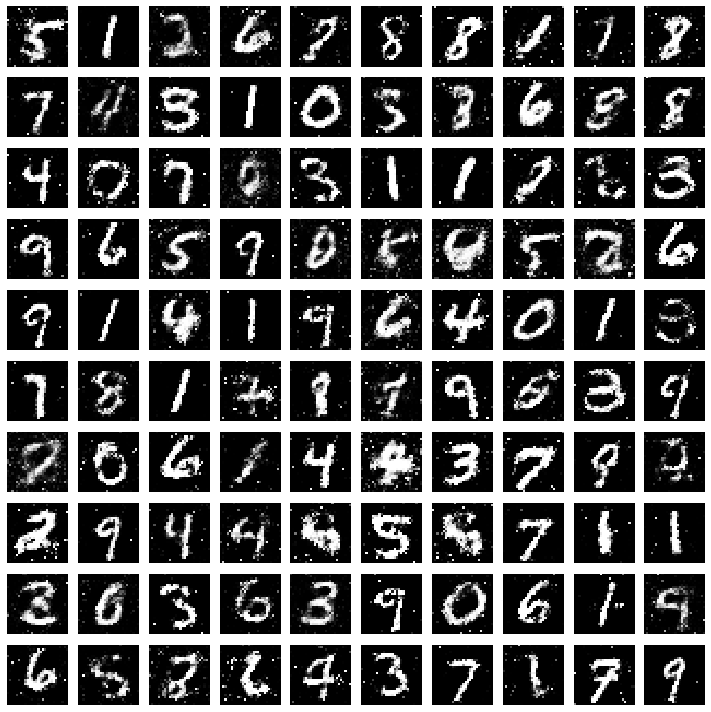

Epoch 22 D Loss 155.4501 G loss 230.2978 
Epoch 23 D Loss 155.6363 G loss 229.8682 
Epoch 24 D Loss 156.0892 G loss 228.9751 
Epoch 25 D Loss 155.6415 G loss 230.3606 
Epoch 26 D Loss 155.6861 G loss 228.8436 


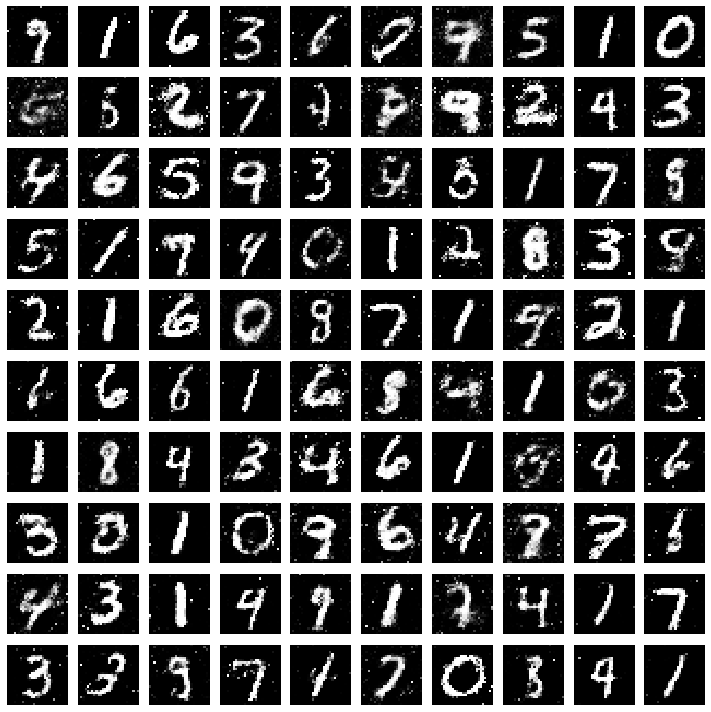

Epoch 27 D Loss 156.0316 G loss 228.4471 
Epoch 28 D Loss 155.9158 G loss 227.9217 
Epoch 29 D Loss 156.2114 G loss 227.7221 
Epoch 30 D Loss 156.4377 G loss 228.0275 
Epoch 31 D Loss 156.4312 G loss 228.6605 


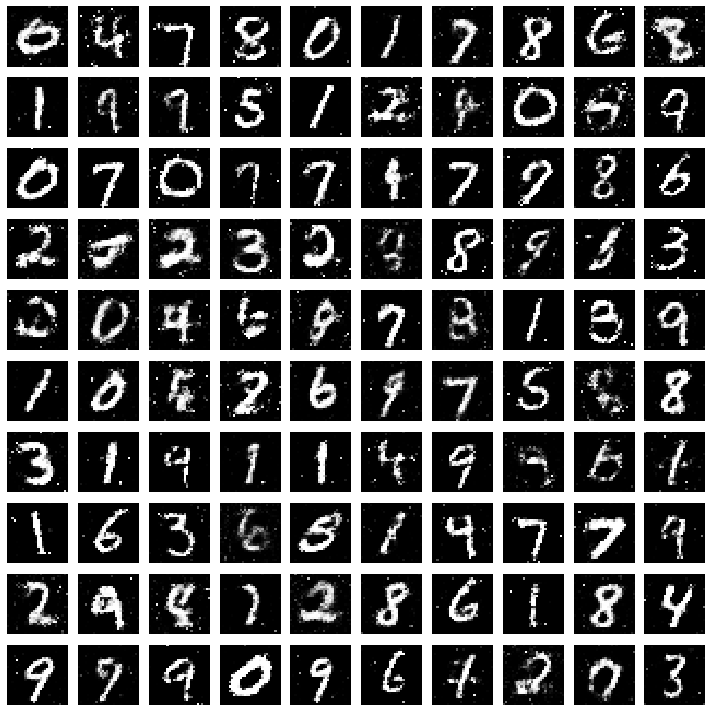

Epoch 32 D Loss 156.4880 G loss 229.0658 
Epoch 33 D Loss 156.6671 G loss 228.1626 
Epoch 34 D Loss 156.6709 G loss 227.6532 
Epoch 35 D Loss 156.6681 G loss 227.0395 
Epoch 36 D Loss 156.7913 G loss 225.7578 


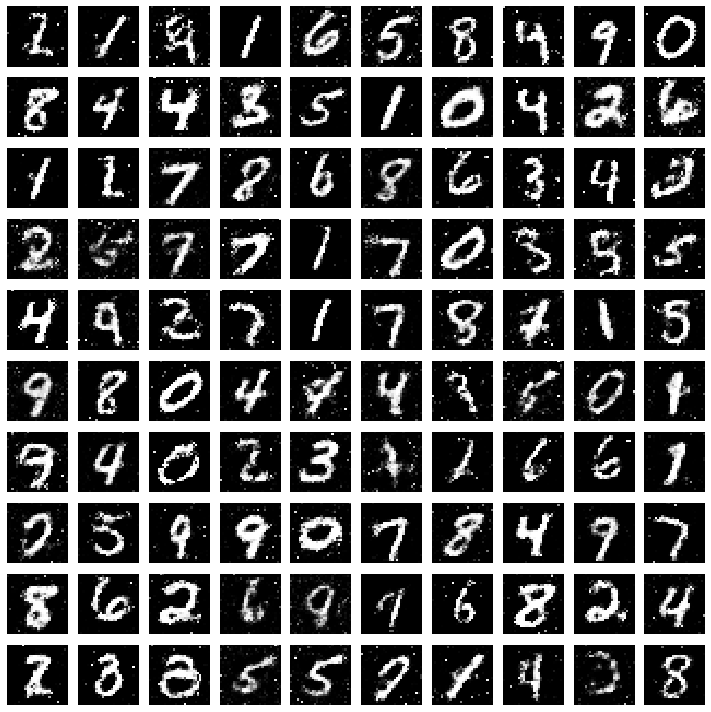

Epoch 37 D Loss 156.9385 G loss 226.4881 
Epoch 38 D Loss 156.6672 G loss 225.3763 
Epoch 39 D Loss 156.8971 G loss 226.4760 
Epoch 40 D Loss 156.7379 G loss 228.0756 
Epoch 41 D Loss 156.7508 G loss 226.1531 


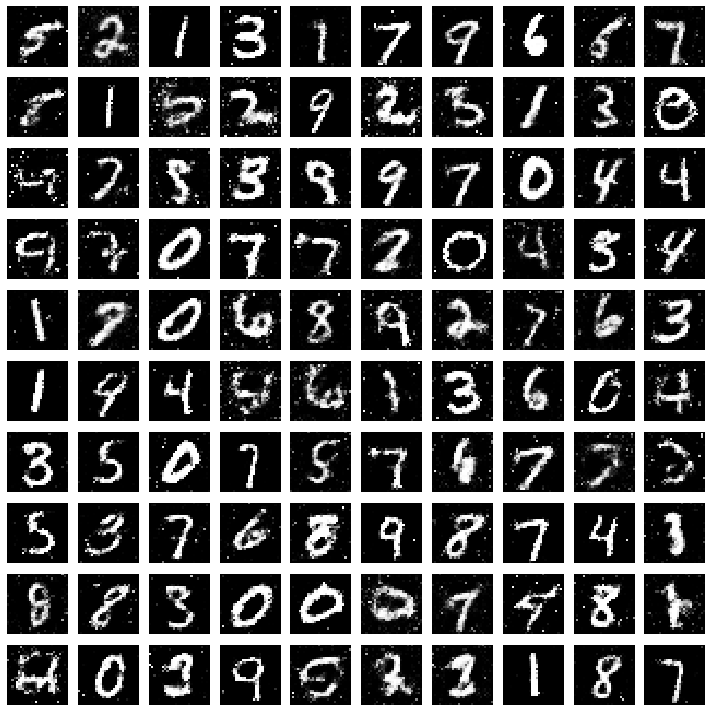

Epoch 42 D Loss 156.8680 G loss 226.1893 
Epoch 43 D Loss 157.0488 G loss 226.0281 
Epoch 44 D Loss 156.9947 G loss 225.3854 
Epoch 45 D Loss 156.7520 G loss 226.1896 
Epoch 46 D Loss 156.9133 G loss 226.2631 


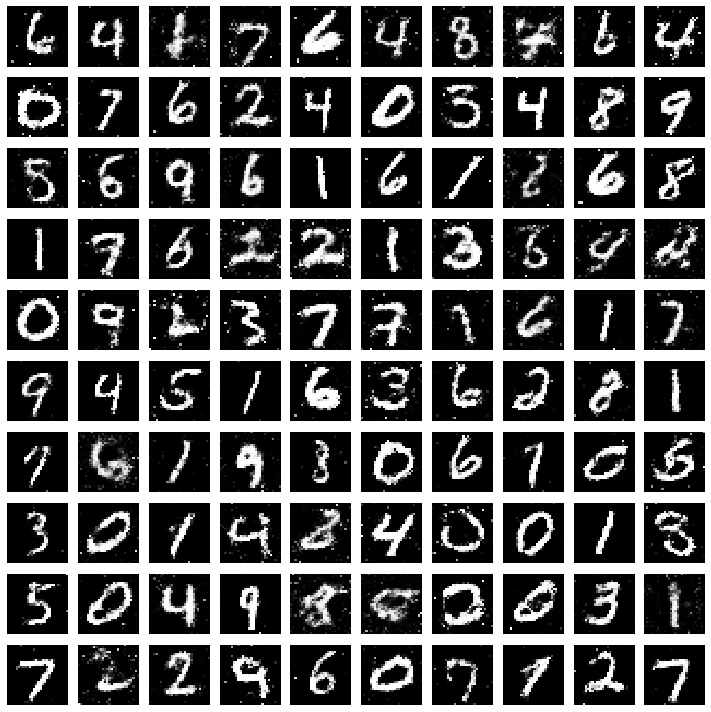

Epoch 47 D Loss 157.2304 G loss 225.3094 
Epoch 48 D Loss 157.1083 G loss 225.4545 
Epoch 49 D Loss 157.1450 G loss 225.9082 
Epoch 50 D Loss 156.9396 G loss 225.9565 
Epoch 51 D Loss 156.9005 G loss 225.7138 


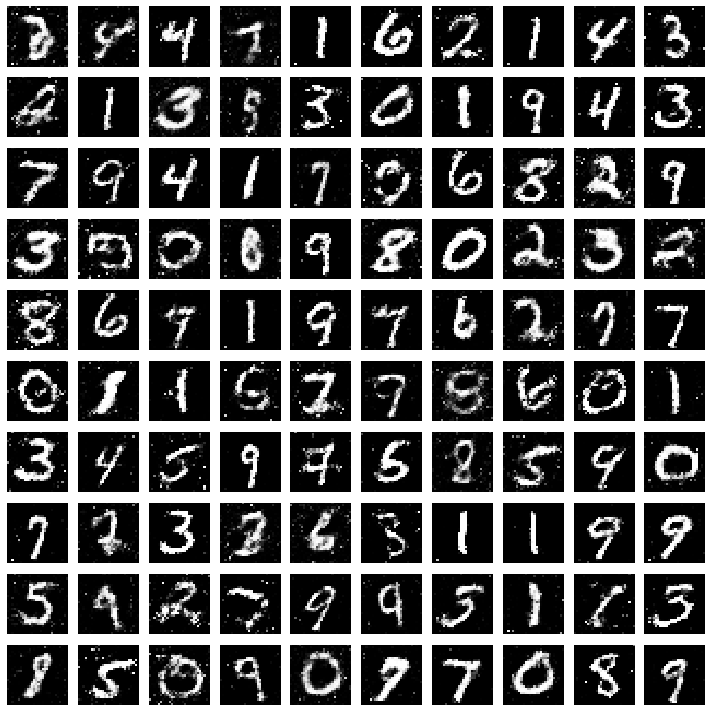

Epoch 52 D Loss 157.1784 G loss 225.6308 
Epoch 53 D Loss 156.7312 G loss 226.4781 
Epoch 54 D Loss 157.1993 G loss 225.7994 
Epoch 55 D Loss 156.6980 G loss 225.9751 
Epoch 56 D Loss 156.8838 G loss 225.8002 


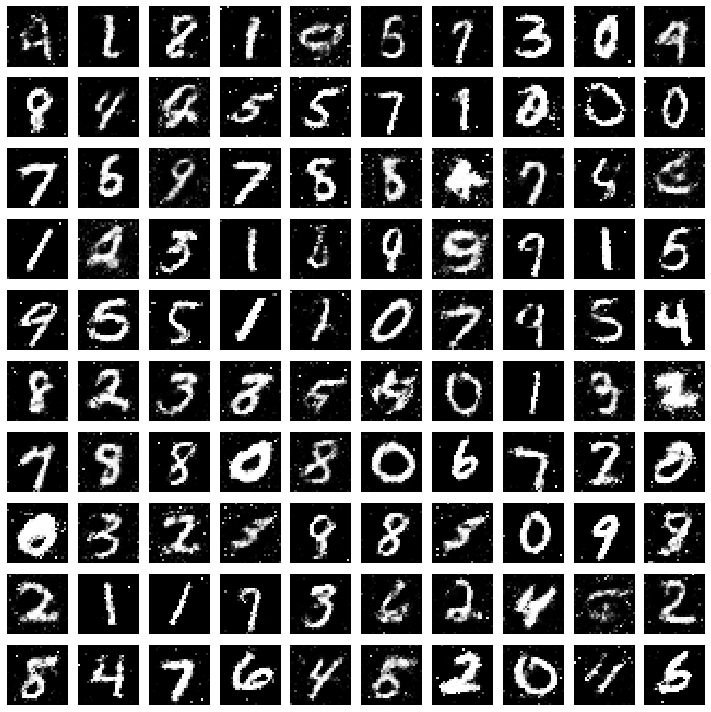

Epoch 57 D Loss 156.9436 G loss 225.0362 
Epoch 58 D Loss 157.0508 G loss 224.7224 
Epoch 59 D Loss 157.1759 G loss 225.5753 
Epoch 60 D Loss 157.1068 G loss 226.3727 
Epoch 61 D Loss 157.2255 G loss 224.3259 


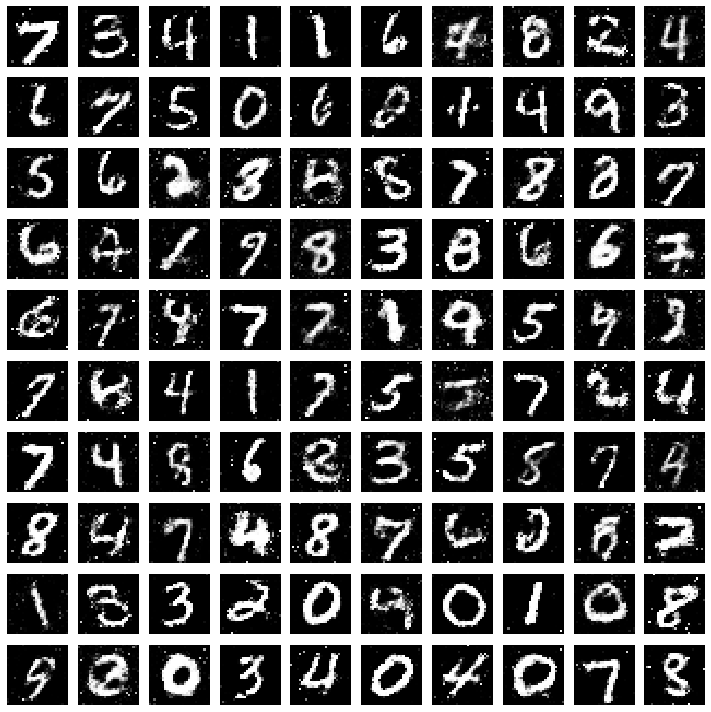

In [0]:
d_losses = []
g_losses =  []

# Training Loop
for epoch in range(EPOCHS+1): 
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    # Mini Batch
    for step in range(NO_OF_BATCHES):
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate fake images assuming generator is frozen
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        #Train on Real and Fake Images
        d_real_loss = discriminator.train_on_batch(real_imgs,real_y)
        d_fake_loss = discriminator.train_on_batch(fake_imgs,fake_y)
        
        d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
        epoch_d_loss += d_loss
        
        # Train Generator
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)
        
    print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
    if (epoch%5)==0: #printing images after every 5 epocs
        #generator.save("model/gen_{0}.h5".format(epoch)) # Saving the model
        showImgs(epoch) # Show the image transformation progress at every step

# It is very clear at the end of all epochs that the newly generated images are very similar to those in the dataset. Hence New images are generated from original MNIST dataset

# Original Images

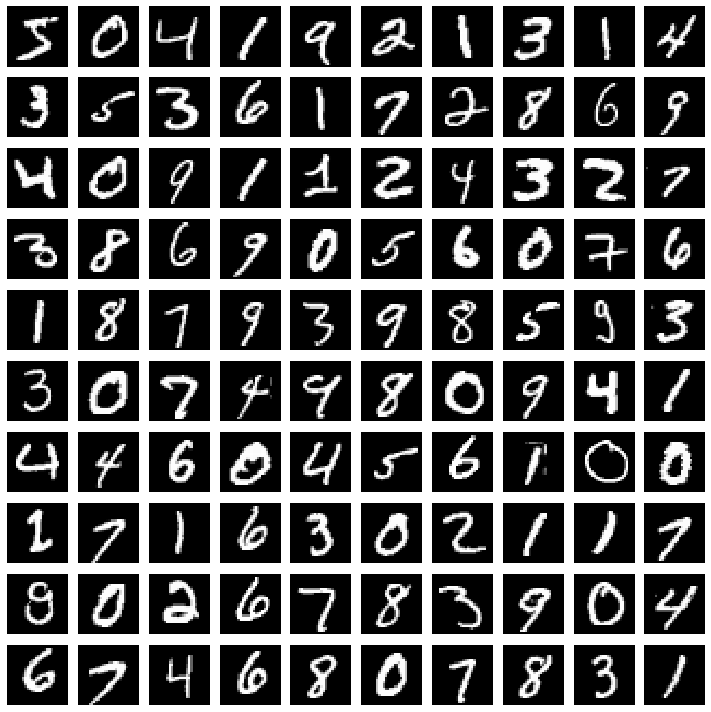

In [0]:
plt.figure(figsize=(10,10))
for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(X_train[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
plt.tight_layout()
plt.show()